In [34]:
import numpy as np
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])


URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])

In [35]:
def merge_data(df):

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning

    print(tempdf.head())
    #
    p =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise_type"])
    p.name = 'premise_type'


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    q =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise"])
    q.name = 'premise'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    s =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["state"])
    s.name = 'state'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    t = tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')['district'])
    t.name = "district"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    
    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w2 = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_group'])
    w2.name = "item_group"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_merged = pd.concat([df,p,q,s,t,u,v,w,w2],axis=1)
    return df_merged    

In [36]:
import numpy as np
import pandas as pd
from datetime import datetime


#Get all months from Jan 22 until today
#datelist = pd.date_range(start ='01/01/2022' , end = '09/30/2023',freq="M").tolist() #be careful. dates are mm/dd/yyyy
datelist = pd.date_range(start ='08/01/2023' , end = '09/30/2023',freq="M").tolist() #be careful. dates are mm/dd/yyyy

datelist = [x.strftime('%Y-%m') for x in datelist]
print(datelist)

def get_all_dataframes(datelist):
    
    df_list=[]

    for month_d in datelist:

        month_parq = month_d +'.parquet'
        URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_{}'.format(month_parq)
        
        df = pd.read_parquet(URL_DATA)
        if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
    
        #df.head()
        
        df_list.append(df)
    
    return df_list

#This stores all price dataframes since Jan 22
df_all_list = get_all_dataframes(datelist)
print(f'Number of dataframes in the list: {len(df_all_list)}')


['2023-08', '2023-09']
Number of dataframes in the list: 2


In [37]:
for i, df in enumerate(df_all_list):
    df_all_list[i] = merge_data(df_all_list[i])


        date  premise_code  item_code  price
0 2023-08-01             2          1    9.4
1 2023-08-01             2          9   36.0
2 2023-08-01             2         16    5.5
3 2023-08-01             2         18    5.5
4 2023-08-01             2         20    5.0
        date  premise_code  item_code  price
0 2023-09-01             2          1    9.4
1 2023-09-01             2          9   36.0
2 2023-09-01             2         16    5.5
3 2023-09-01             2         18    5.5
4 2023-09-01             2         19    6.0


Master Dataframe All Items

In [38]:
df_master = pd.DataFrame(columns=['date','premise_code','item_code','price','premise_type','premise','state','district','item','unit','item_category'])
#df_master.head()
for df in df_all_list:
    df_master = pd.concat([df_master,df])

df_master.head()    

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
0,2023-08-01,2,1,9.4,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
1,2023-08-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING,BARANGAN SEGAR
2,2023-08-01,2,16,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN,BARANGAN SEGAR
3,2023-08-01,2,18,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN,BARANGAN SEGAR
4,2023-08-01,2,20,5.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,TEMBIKAI MERAH BERBIJI,1kg,BUAH-BUAHAN,BARANGAN SEGAR


In [39]:
df_master[df_master['item_category']=='BERAS'].tail()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
968822,2023-09-12,17128,1491,6.7,Hypermarket,MYDIN WHOLESALE HYPERMARKET BERTAM,Pulau Pinang,Seberang Perai Utara,BERAS PULUT THAILAND (SUSU) PELBAGAI JENAMA,1kg,BERAS,BARANGAN BERBUNGKUS
968823,2023-09-12,17128,1492,6.0,Hypermarket,MYDIN WHOLESALE HYPERMARKET BERTAM,Pulau Pinang,Seberang Perai Utara,BERAS PULUT THAILAND (BIASA) PELBAGAI JENAMA,1kg,BERAS,BARANGAN BERBUNGKUS
1048204,2023-09-13,18152,1491,5.5,Borong,PASAR BORONG SEGAMAT,Johor,Segamat,BERAS PULUT THAILAND (SUSU) PELBAGAI JENAMA,1kg,BERAS,BARANGAN BERBUNGKUS
1048205,2023-09-13,18152,1492,4.3,Borong,PASAR BORONG SEGAMAT,Johor,Segamat,BERAS PULUT THAILAND (BIASA) PELBAGAI JENAMA,1kg,BERAS,BARANGAN BERBUNGKUS
1048992,2023-09-13,18190,1491,7.0,Borong,KOMPLEKS PASAR BORONG KEMUNTING,Pahang,Kuantan,BERAS PULUT THAILAND (SUSU) PELBAGAI JENAMA,1kg,BERAS,BARANGAN BERBUNGKUS


In [40]:
item_group_list = df_master["item_group"].unique()
item_cat_list = df_master["item_category"].unique()

Master Dataframe Beras 10kg

In [41]:
#df_master[df_master["item_group"]=="BARANGAN SEGAR"]
#df_beras = df_master[df_master["item_category"]=="BERAS"]
#df_beras = df_master.query('item_category=="BERAS" and unit=="10 kg"')
df_beras = df_master.query('item_category=="BERAS" and unit=="10 kg"')

print(len(df_beras))
df_beras["date"].unique()

5832


<DatetimeArray>
['2023-08-01 00:00:00', '2023-08-07 00:00:00', '2023-08-13 00:00:00',
 '2023-08-14 00:00:00', '2023-08-15 00:00:00', '2023-08-17 00:00:00',
 '2023-08-20 00:00:00', '2023-08-21 00:00:00', '2023-08-26 00:00:00',
 '2023-08-28 00:00:00', '2023-09-02 00:00:00', '2023-09-04 00:00:00',
 '2023-09-05 00:00:00', '2023-09-06 00:00:00', '2023-09-11 00:00:00']
Length: 15, dtype: datetime64[ns]

In [42]:
def import_local_fun(xstr):

    #print(xstr)

    if xstr.__contains__('IMPORT'):
        return 'IMPORT'
    else:
        return 'TEMPATAN'

df_beras["import_or_local"] = df_beras["item"].apply(import_local_fun)
print(len(df_beras))


df_beras = df_beras[df_beras["import_or_local"]=="TEMPATAN"]
df_beras.head()

5832


C:\Users\shahr\AppData\Local\Temp\ipykernel_8256\2883157548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beras["import_or_local"] = df_beras["item"].apply(import_local_fun)


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local
45313,2023-08-01,17313,1833,31.50,Pasar Raya / Supermarket,NAMLEONG DEPARTMENTAL STORE,Sarawak,Saratok,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
424892,2023-08-07,3,992,25.59,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
424921,2023-08-07,3,1445,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
424949,2023-08-07,3,1582,26.00,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
425163,2023-08-07,7,1445,26.00,Kedai Runcit,KEDAI RUNCIT SYAZ MAJU PRESINT 9,W.P. Putrajaya,Wp Putrajaya,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN


In [43]:
beras_itemcode_list = df_beras["item_code"].unique()
print(len(beras_itemcode_list))
beras_itemcode_list



11


array([1833, 992, 1445, 1582, 2004, 1581, 1822, 1823, 1824, 1832, 1902],
      dtype=object)

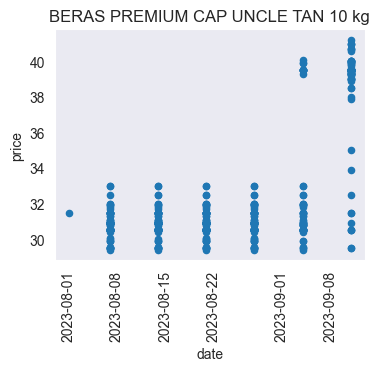

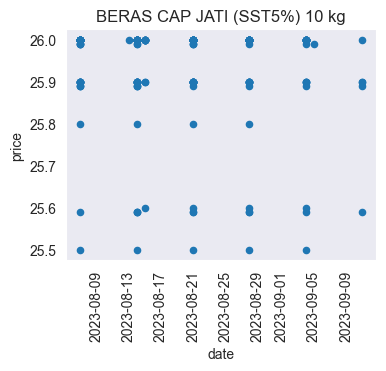

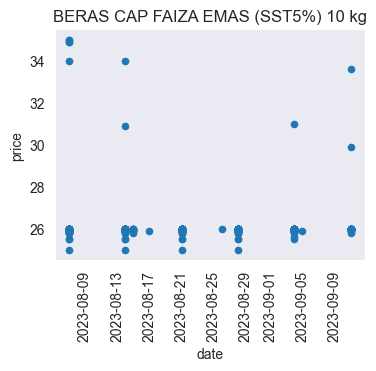

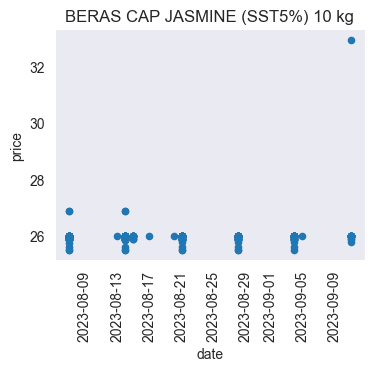

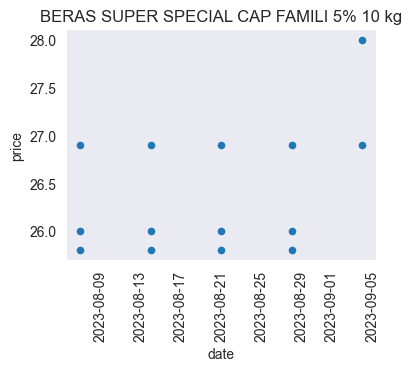

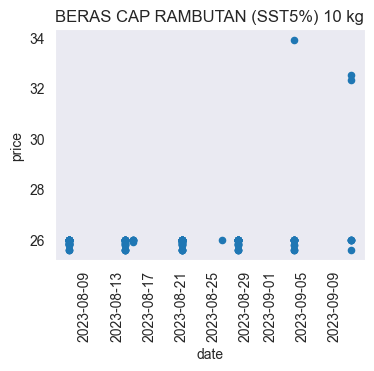

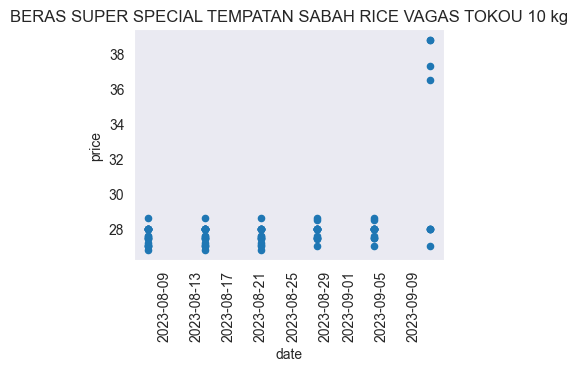

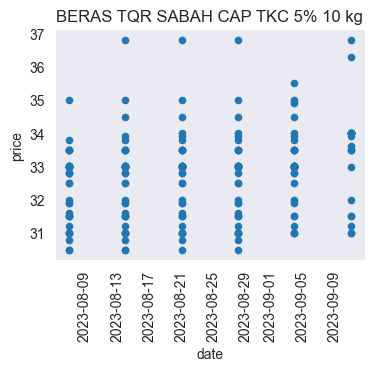

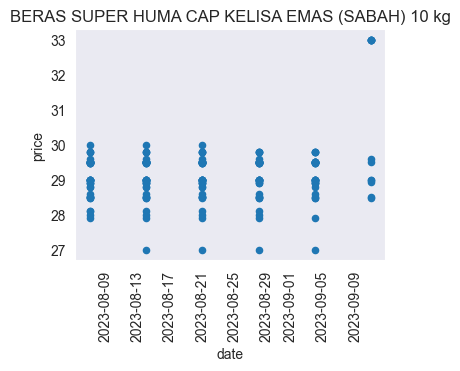

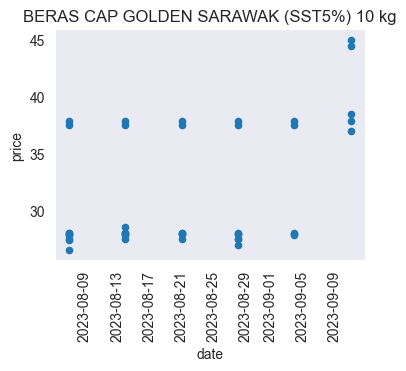

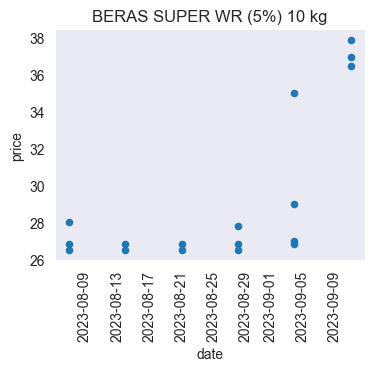

In [44]:
for i in beras_itemcode_list:

    beras_type = df_beras[df_beras["item_code"]==i]["item"].unique()
    beras_unit = df_beras[df_beras["item_code"]==i]["unit"].unique()

    title_plt = beras_type[0] + ' ' + beras_unit[0]  

    df_beras[df_beras["item_code"]==i].plot.scatter(x='date',y="price",rot=90,title=title_plt,figsize=(4,3))

c:\Users\shahr\code\.mlenv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


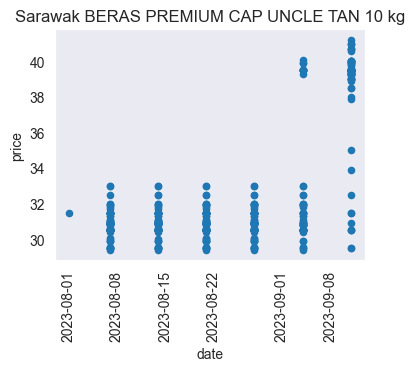

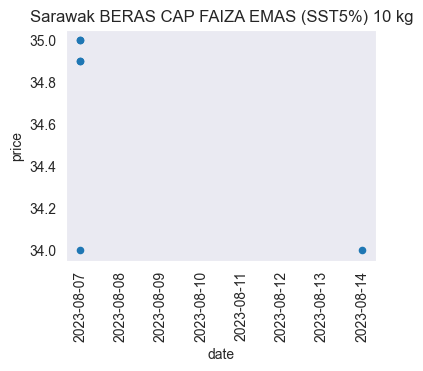

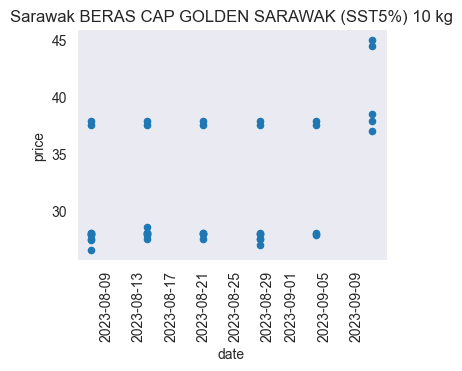

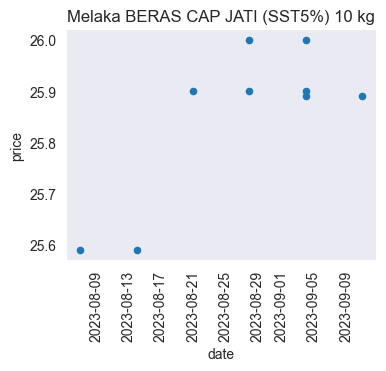

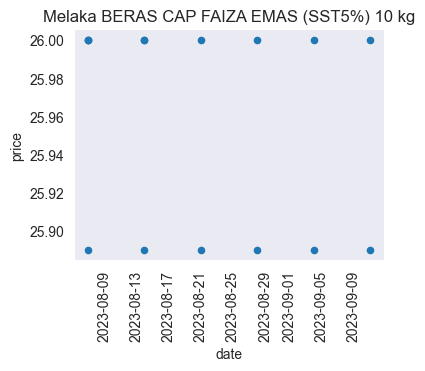

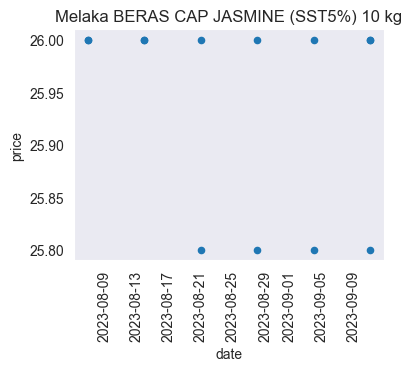

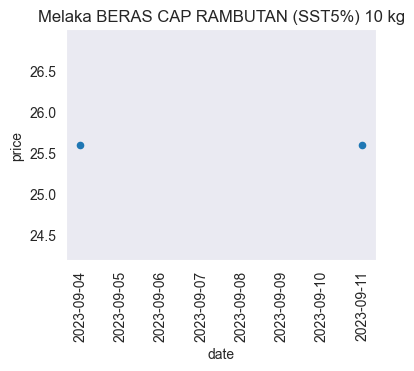

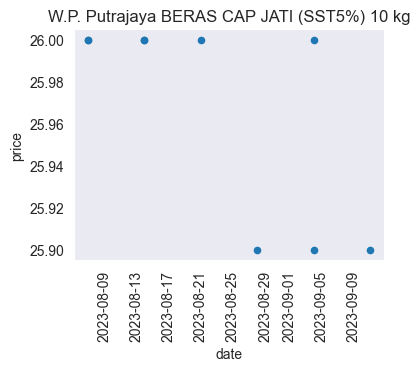

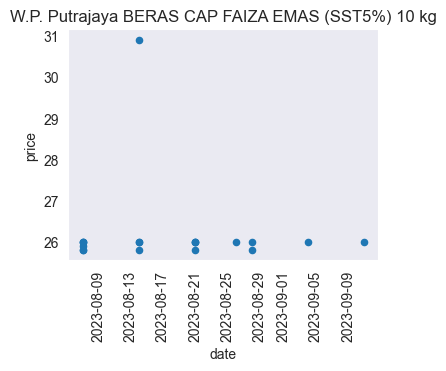

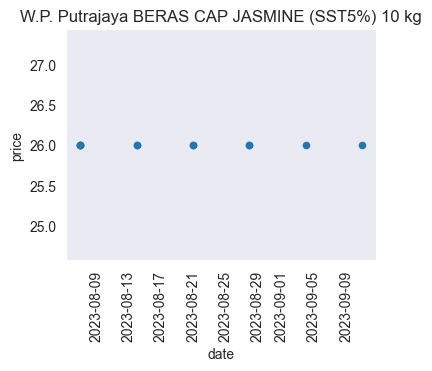

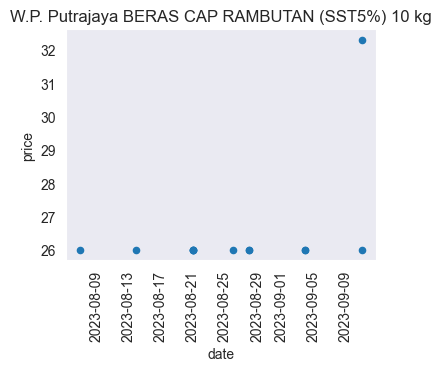

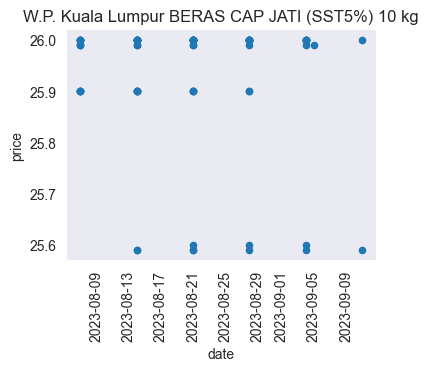

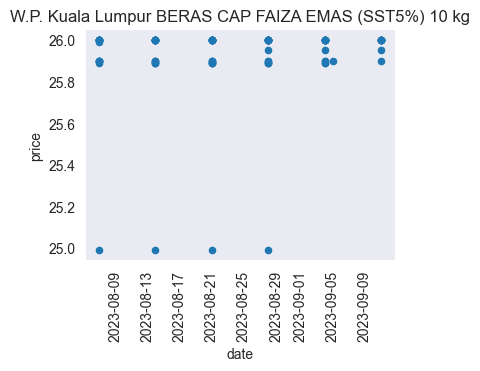

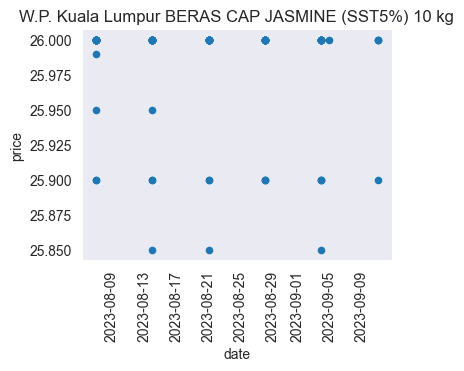

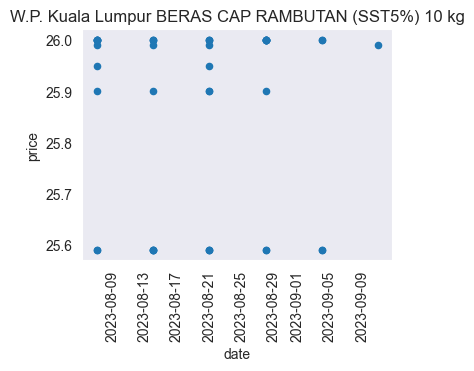

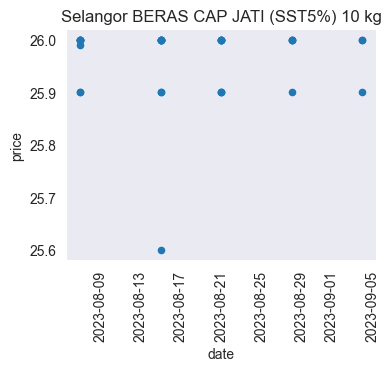

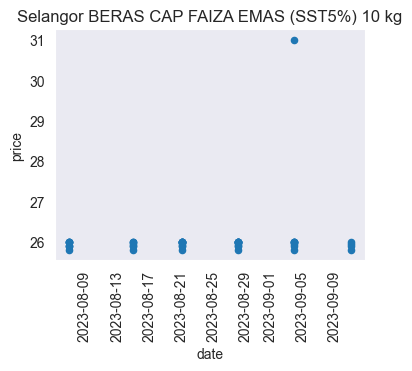

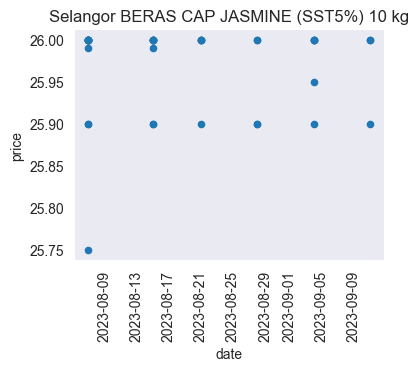

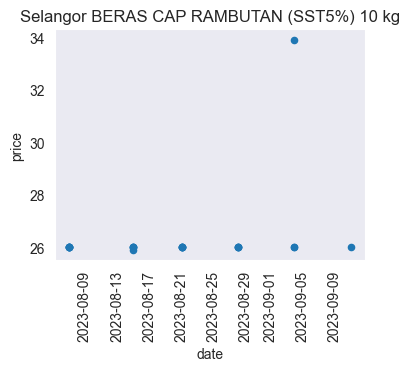

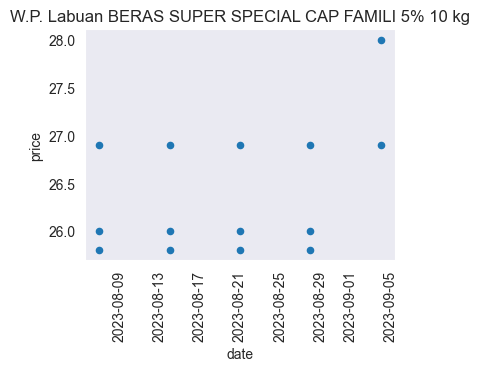

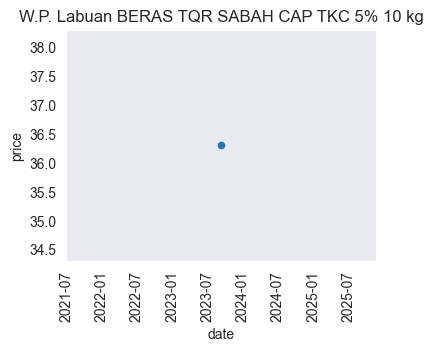

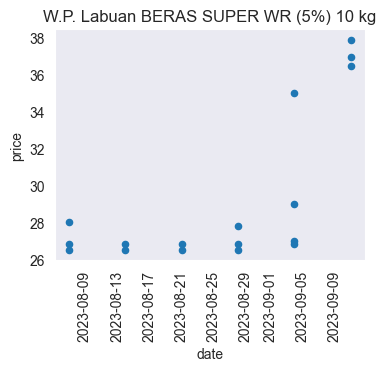

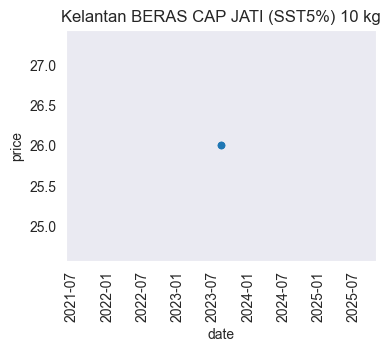

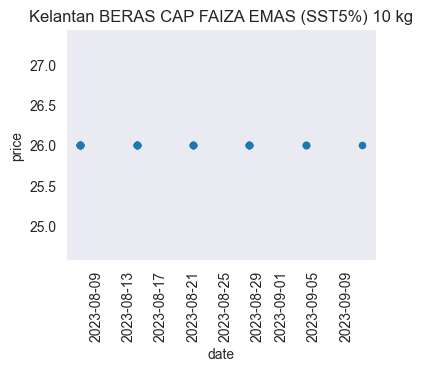

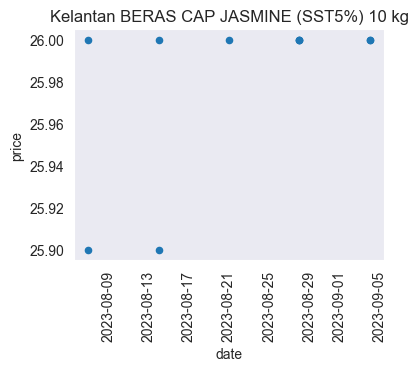

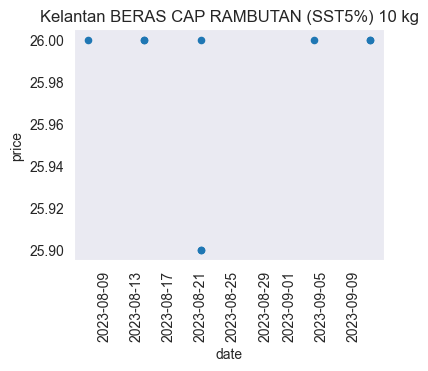

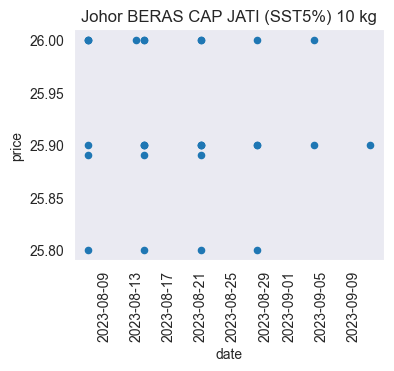

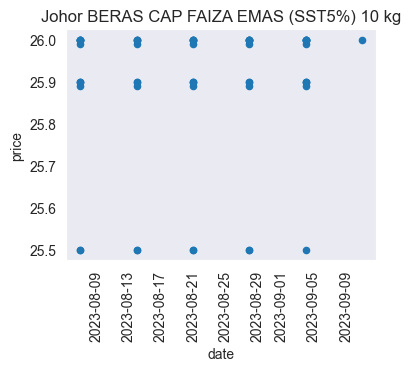

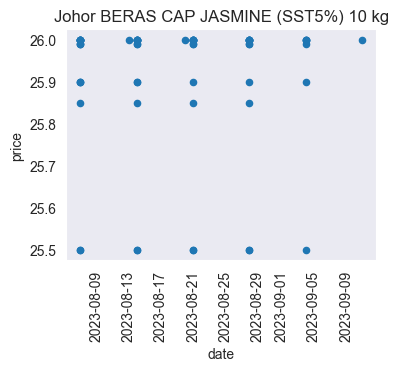

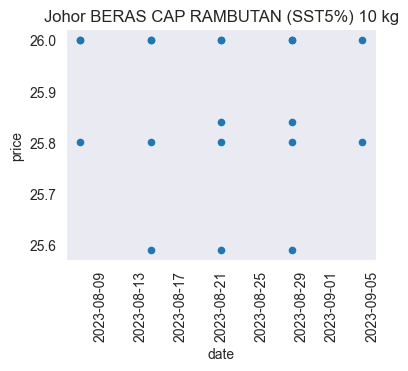

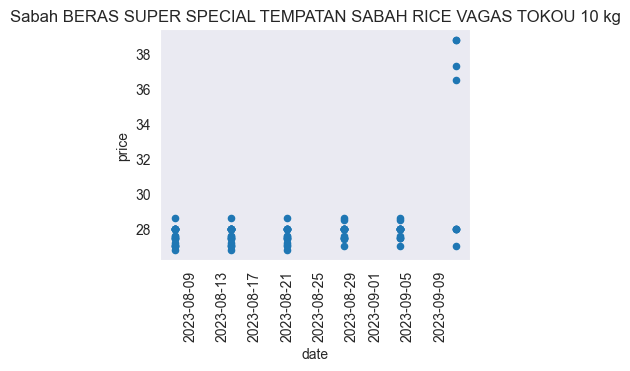

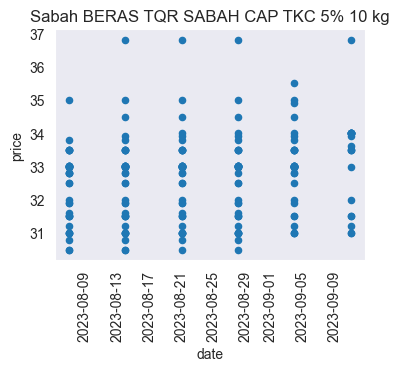

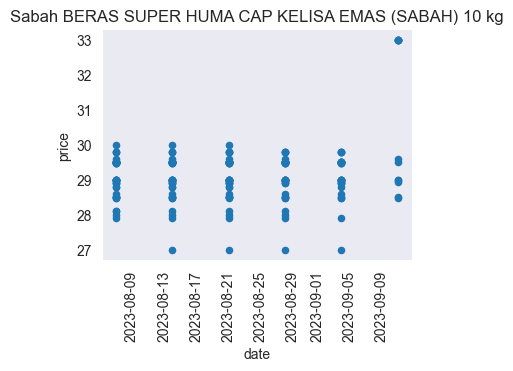

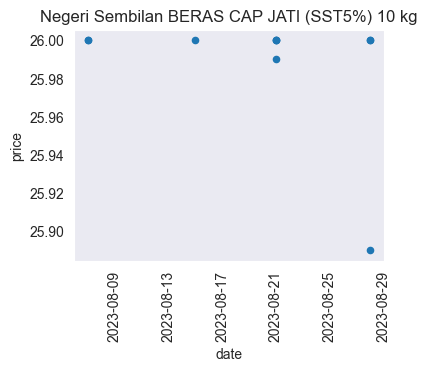

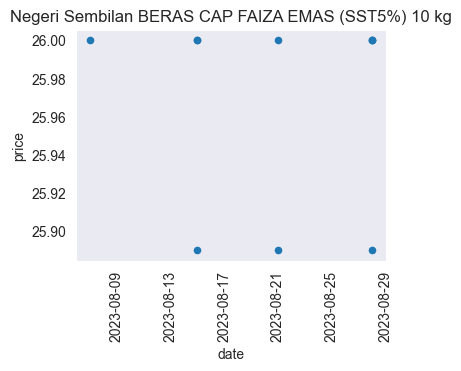

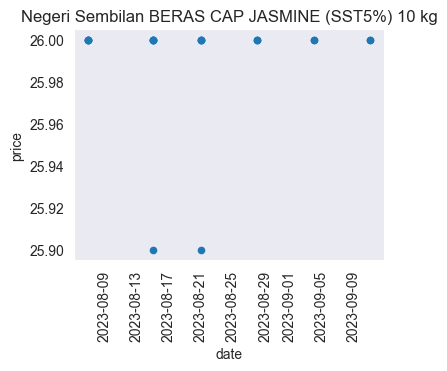

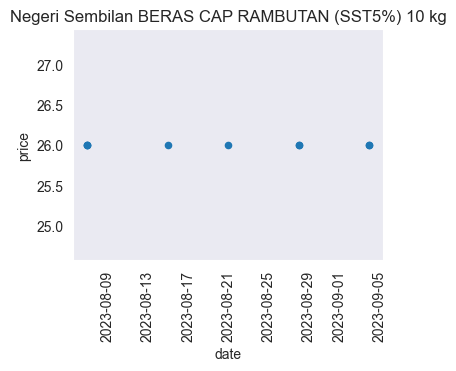

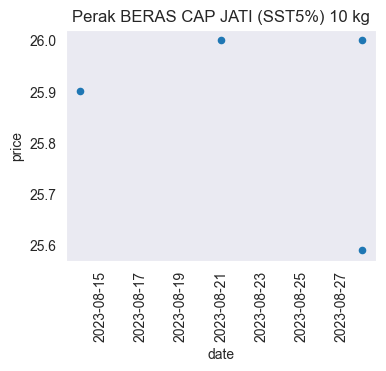

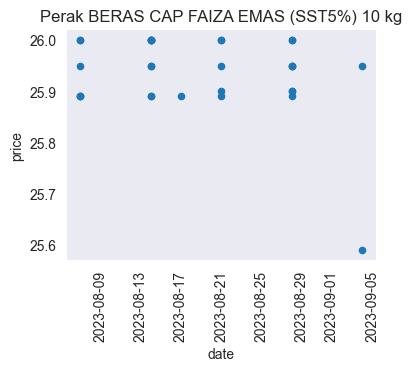

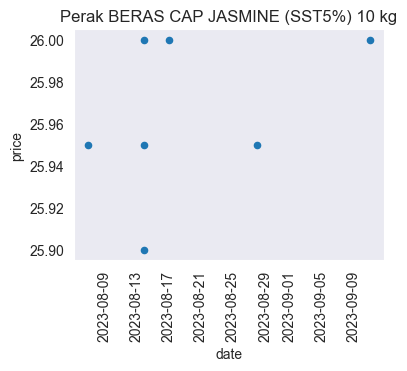

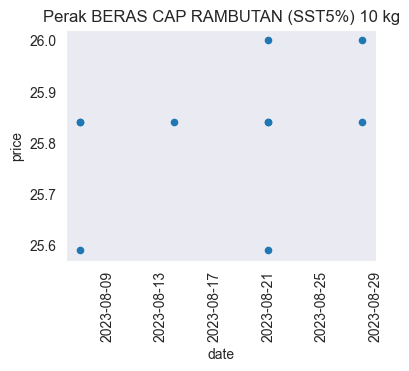

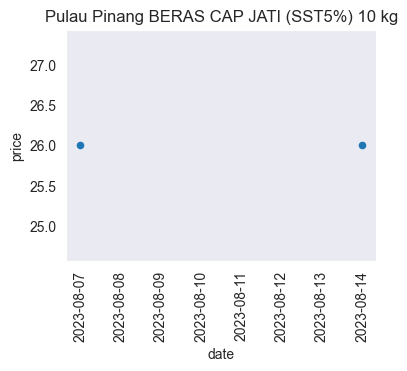

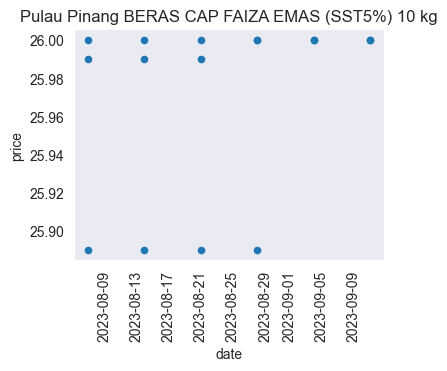

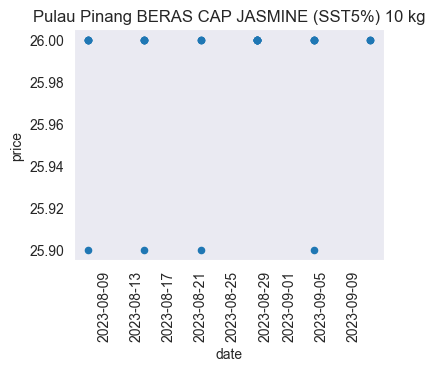

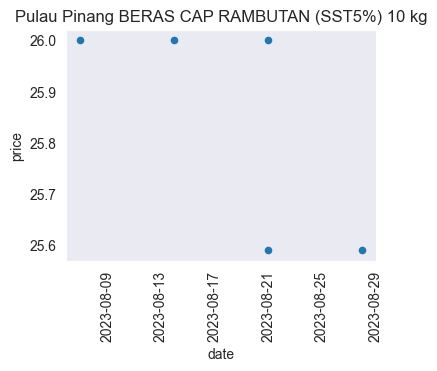

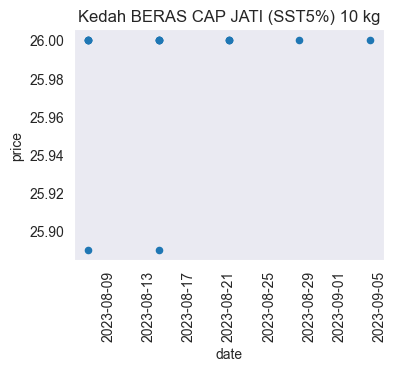

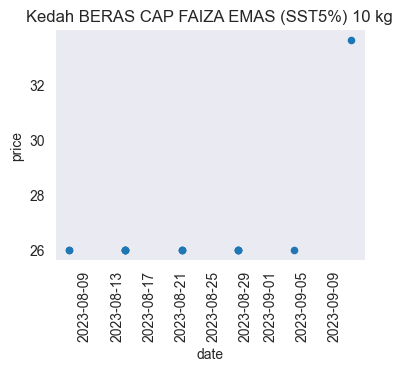

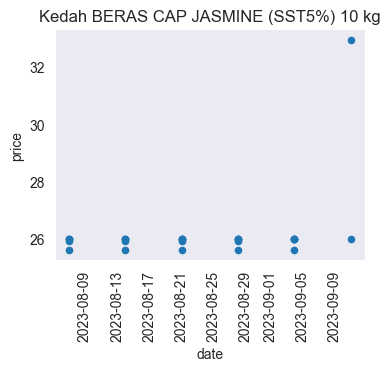

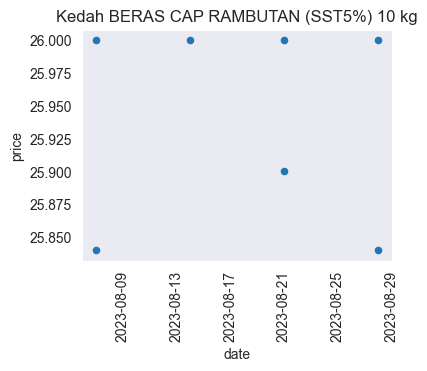

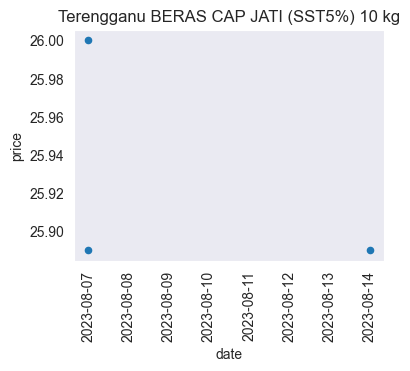

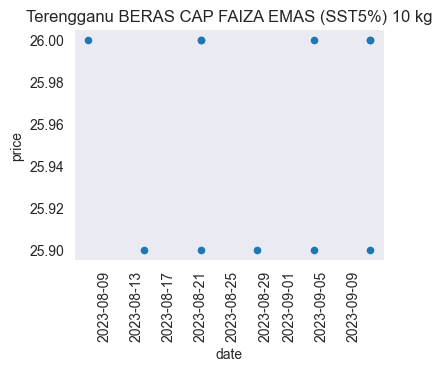

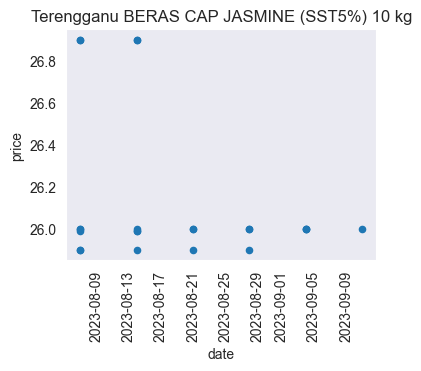

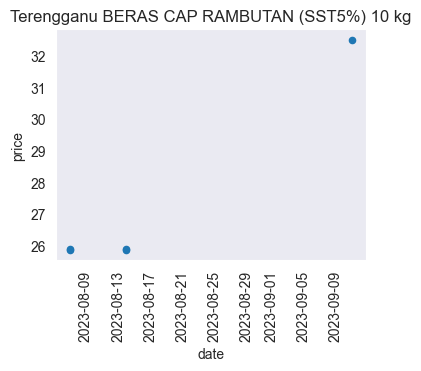

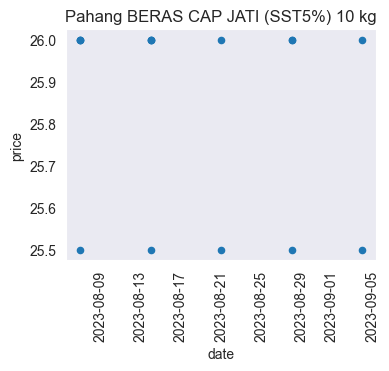

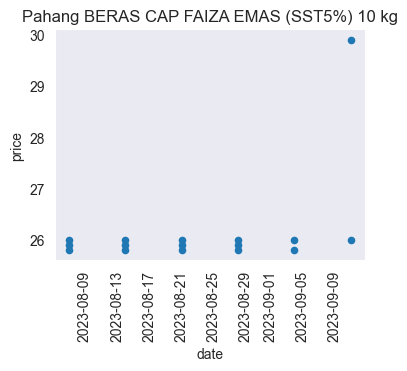

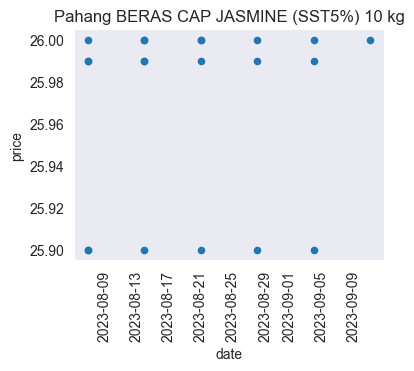

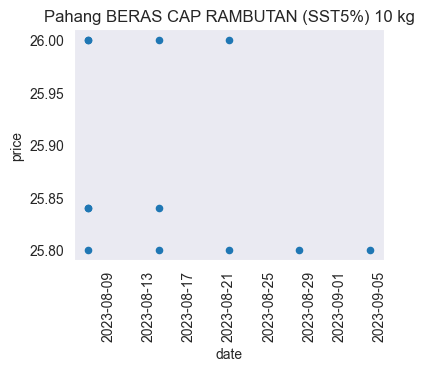

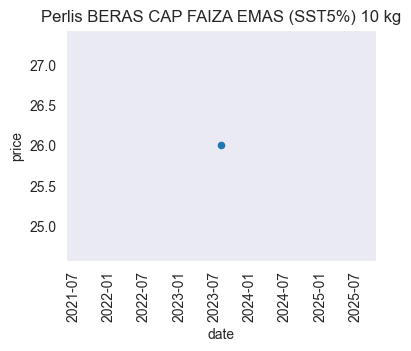

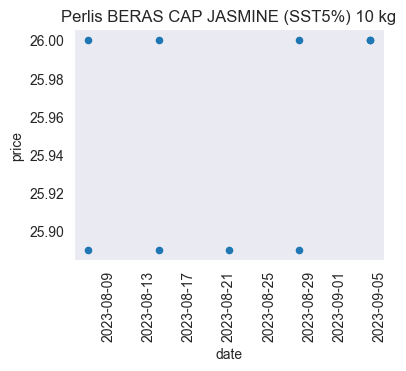

In [45]:
for state in df_beras["state"].unique():

    x_df = df_beras[df_beras["state"]==state]

    if (x_df.empty==False):
        
        for i in beras_itemcode_list:

            y_df = x_df[x_df["item_code"]==i]

            if (y_df.empty==False):
                
                beras_type = y_df["item"].unique()
                beras_unit = y_df["unit"].unique()

                #print(beras_type)
                #print(beras_unit)

                title_plt = state + ' ' + beras_type[0] + ' ' + beras_unit[0] 

                y_df.plot.scatter(x='date',y="price",rot=90,title=title_plt,figsize=(4,3))

Previously (generally) Beras tempatan average for 10kg is rm26, import is rm39. Now beras tempatan has shot up to rm32-39, as expensive as import. So let's find the data on tempatan beras that has shot up and where is this happening

In [46]:
df_beras.head()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local
45313,2023-08-01,17313,1833,31.50,Pasar Raya / Supermarket,NAMLEONG DEPARTMENTAL STORE,Sarawak,Saratok,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
424892,2023-08-07,3,992,25.59,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
424921,2023-08-07,3,1445,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
424949,2023-08-07,3,1582,26.00,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN
425163,2023-08-07,7,1445,26.00,Kedai Runcit,KEDAI RUNCIT SYAZ MAJU PRESINT 9,W.P. Putrajaya,Wp Putrajaya,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN


In [47]:
df_beras["monthdate"] = df_beras["date"].apply(lambda x: x.strftime('%Y-%m'))

df_beras.head()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate
45313,2023-08-01,17313,1833,31.50,Pasar Raya / Supermarket,NAMLEONG DEPARTMENTAL STORE,Sarawak,Saratok,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-08
424892,2023-08-07,3,992,25.59,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-08
424921,2023-08-07,3,1445,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-08
424949,2023-08-07,3,1582,26.00,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-08
425163,2023-08-07,7,1445,26.00,Kedai Runcit,KEDAI RUNCIT SYAZ MAJU PRESINT 9,W.P. Putrajaya,Wp Putrajaya,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-08


In [48]:
df_beras_aug23 = df_beras.query('monthdate=="2023-08"') #ONE MONTH data
df_beras_sep23 = df_beras.query('date=="2023-09-11"') #ONE DAY data, take the last date

#print(len(df_beras_aug23))
#df_beras_aug23.head()

print(len(df_beras_sep23))
df_beras_sep23.head()





186


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate
743498,2023-09-11,3,992,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
743540,2023-09-11,3,1445,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
743570,2023-09-11,3,1581,25.59,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP RAMBUTAN (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
743571,2023-09-11,3,1582,26.00,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
744628,2023-09-11,176,992,26.00,Hypermarket,LOTUS'S CHERAS,W.P. Kuala Lumpur,Cheras,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09


In [49]:
new_list = []

for premise_c in df_beras_sep23["premise_code"].unique():
    

    for item_c in df_beras_sep23["item_code"].unique():

        #Takes the average price of x beras for y premise
        
        
        #x_df = df_beras_aug23[df_beras_aug23["premise_code"]==premise]
        x_df = df_beras_aug23.query('premise_code==@premise_c and item_code==@item_c')
        if (x_df.empty==False):
            mean_x = x_df["price"].mean()
            new_list.append([premise_c,item_c,mean_x])

        #else:
        #    print(f'df_aug is EMPTY item_code:{item_c} premise_code:{premise_c} ')

        
        

In [50]:
print(len(new_list))
new_list2 = pd.DataFrame(new_list,columns=['premise_code_new','item_code_new','price_aug23_mean'])
new_list2.head()

new_list2["premise_code_new"] = new_list2["premise_code_new"].astype(str)
new_list2["item_code_new"] = new_list2["item_code_new"].astype(str)


def get_index_code(premise,item_code):
    return premise + '-' + item_code


new_list2["index_code"] = new_list2.apply(lambda x: get_index_code(x.premise_code_new,x.item_code_new),axis=1)

new_list2 = new_list2.set_index('index_code')

new_list2.head()

215


,premise_code_new,item_code_new,price_aug23_mean
index_code,,,
3-992,3,992,25.59
3-1445,3,1445,25.89
3-1582,3,1582,26.00
176-992,176,992,26.00
176-1445,176,1445,26.00


In [51]:
df_beras_sep23["premise_code"] = df_beras_sep23["premise_code"].astype(str)
df_beras_sep23["item_code"] = df_beras_sep23["item_code"].astype(str)

df_beras_sep23 = df_beras_sep23.rename(columns={'price':'price_sep23'})

df_beras_sep23["index_code"] = df_beras_sep23.apply(lambda x: get_index_code(x.premise_code,x.item_code),axis=1)
#df_beras_sep23.head()
df_beras_sep23 = df_beras_sep23.set_index('index_code')
#print(df_beras_sep23.info())
df_beras_sep23.index

C:\Users\shahr\AppData\Local\Temp\ipykernel_8256\2085502937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beras_sep23["premise_code"] = df_beras_sep23["premise_code"].astype(str)
C:\Users\shahr\AppData\Local\Temp\ipykernel_8256\2085502937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beras_sep23["item_code"] = df_beras_sep23["item_code"].astype(str)


Index(['3-992', '3-1445', '3-1581', '3-1582', '176-992', '176-1445', '380-992',
       '754-1833', '873-1823', '890-1823',
       ...
       '20852-1823', '20852-1824', '20856-1833', '20864-1833', '20865-1832',
       '20865-1833', '20866-1833', '20867-1833', '20872-1833', '20884-1833'],
      dtype='object', name='index_code', length=186)

In [52]:
df_beras_sep23.head()

,date,premise_code,item_code,price_sep23,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate
index_code,,,,,,,,,,,,,,
3-992,2023-09-11,3,992,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
3-1445,2023-09-11,3,1445,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
3-1581,2023-09-11,3,1581,25.59,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP RAMBUTAN (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
3-1582,2023-09-11,3,1582,26.00,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
176-992,2023-09-11,176,992,26.00,Hypermarket,LOTUS'S CHERAS,W.P. Kuala Lumpur,Cheras,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09


In [53]:
df_beras_merged = pd.merge(new_list2,df_beras_sep23,how='inner', on='index_code')
print(len(df_beras_merged))
#df_beras_merged.sample()
df_beras_merged.head()

159


,premise_code_new,item_code_new,price_aug23_mean,date,premise_code,item_code,price_sep23,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate
index_code,,,,,,,,,,,,,,,,,
3-992,3,992,25.59,2023-09-11,3,992,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
3-1445,3,1445,25.89,2023-09-11,3,1445,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
3-1582,3,1582,26.00,2023-09-11,3,1582,26.00,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
176-992,176,992,26.00,2023-09-11,176,992,26.00,Hypermarket,LOTUS'S CHERAS,W.P. Kuala Lumpur,Cheras,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09
176-1445,176,1445,26.00,2023-09-11,176,1445,26.00,Hypermarket,LOTUS'S CHERAS,W.P. Kuala Lumpur,Cheras,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09


In [54]:
def get_increase(price_sept, price_aug):
    
    diff = price_sept - price_aug

    if diff>0:
        return 'INCREASE'
    else:
        return 'DECREASE_STATIC'

def get_increase_percentage(price_sept, price_aug):
    
    percentage = (price_sept - price_aug)/price_aug *100
    return percentage

df_beras_merged["increase"]  = df_beras_merged.apply(lambda x: get_increase(x.price_sep23,x.price_aug23_mean),axis=1)
df_beras_merged["percentage"]  = df_beras_merged.apply(lambda x: get_increase_percentage(x.price_sep23,x.price_aug23_mean),axis=1)

df_beras_merged.sample(5)

,premise_code_new,item_code_new,price_aug23_mean,date,premise_code,item_code,price_sep23,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate,increase,percentage
index_code,,,,,,,,,,,,,,,,,,,
18160-1445,18160,1445,25.90,2023-09-11,18160,1445,25.9,Pasar Raya / Supermarket,PASARAYA XIRI GONG DATOK,Terengganu,Kuala Nerus,BERAS CAP FAIZA EMAS (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,1.371704e-14
6177-1833,6177,1833,30.59,2023-09-11,6177,1833,39.3,Pasar Raya / Supermarket,H&L SERIAN,Sarawak,Serian,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,2.847336e+01
17293-1824,17293,1824,29.50,2023-09-11,17293,1824,29.5,Pasar Mini,GREAT VALUE STORE,Sabah,Tamparuli,BERAS SUPER HUMA CAP KELISA EMAS (SABAH),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,DECREASE_STATIC,0.000000e+00
20866-1833,20866,1833,30.59,2023-09-11,20866,1833,39.3,Pasar Raya / Supermarket,H&L XTRA (ECO MALL PETRAJAYA),Sarawak,Kuching,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,2.847336e+01
873-1823,873,1823,33.90,2023-09-11,873,1823,33.9,Pasar Raya / Supermarket,BESTAMART (TENOM),Sabah,Tenom,BERAS TQR SABAH CAP TKC 5%,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,DECREASE_STATIC,0.000000e+00


In [55]:
df_beras_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3-992 to 20884-1833
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   premise_code_new  159 non-null    object        
 1   item_code_new     159 non-null    object        
 2   price_aug23_mean  159 non-null    float64       
 3   date              159 non-null    datetime64[ns]
 4   premise_code      159 non-null    object        
 5   item_code         159 non-null    object        
 6   price_sep23       159 non-null    float64       
 7   premise_type      159 non-null    object        
 8   premise           159 non-null    object        
 9   state             159 non-null    object        
 10  district          159 non-null    object        
 11  item              159 non-null    object        
 12  unit              159 non-null    object        
 13  item_category     159 non-null    object        
 14  item_group        15

New index_readable

In [56]:
#df_beras_merged["index_readable"] = df_beras_merged['item'] + ',' + df_beras_merged['premise'] + ',' + df_beras_merged['district']
df_beras_merged["index_readable"] = df_beras_merged['premise'] + ',' + df_beras_merged['district'] + ',' + df_beras_merged['state']

In [57]:
#df_beras_merged.head()

x = df_beras_merged.sort_values('date')
x.head()

,premise_code_new,item_code_new,price_aug23_mean,date,premise_code,item_code,price_sep23,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate,increase,percentage,index_readable
index_code,,,,,,,,,,,,,,,,,,,,
3-992,3,992,25.59,2023-09-11,3,992,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,1.172333,"JUSCO AYER KEROH,Melaka Tengah,Melaka"
17958-1582,17958,1582,25.80,2023-09-11,17958,1582,25.80,Pasar Mini,ANGEE WHOLESALE SDN. BHD,Melaka,Melaka Tengah,BERAS CAP JASMINE (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,DECREASE_STATIC,0.000000,"ANGEE WHOLESALE SDN. BHD,Melaka Tengah,Melaka"
17987-1833,17987,1833,30.90,2023-09-11,17987,1833,39.30,Hypermarket,MYDIN HYPERMARKET VISTA TUNKU,Sarawak,Kuching,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,27.184466,"MYDIN HYPERMARKET VISTA TUNKU,Kuching,Sarawak"
18073-1833,18073,1833,30.90,2023-09-11,18073,1833,39.50,Pasar Mini,EVERWIN SUPERMARKET (SELANGAU),Sarawak,Selangau,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,27.831715,"EVERWIN SUPERMARKET (SELANGAU),Selangau,Sarawak"
18089-1833,18089,1833,29.90,2023-09-11,18089,1833,39.20,Kedai Runcit,I MART XCEL SDN. BHD,Sarawak,Kapit,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,31.103679,"I MART XCEL SDN. BHD,Kapit,Sarawak"


In [58]:
df_beras_naik = df_beras_merged[df_beras_merged['increase']=="INCREASE"]

print(len(df_beras_naik))
df_beras_naik.head()


94


,premise_code_new,item_code_new,price_aug23_mean,date,premise_code,item_code,price_sep23,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate,increase,percentage,index_readable
index_code,,,,,,,,,,,,,,,,,,,,
3-992,3,992,25.59,2023-09-11,3,992,25.89,Pasar Raya / Supermarket,JUSCO AYER KEROH,Melaka,Melaka Tengah,BERAS CAP JATI (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,1.172333,"JUSCO AYER KEROH,Melaka Tengah,Melaka"
754-1833,754,1833,30.59,2023-09-11,754,1833,39.30,Pasar Raya / Supermarket,H&L SIBURAN,Sarawak,Serian,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,28.473357,"H&L SIBURAN,Serian,Sarawak"
1000-1833,1000,1833,31.90,2023-09-11,1000,1833,39.80,Pasar Mini,LIAN YII MARKETING SDN.BHD.,Sarawak,Sri Aman,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,24.764890,"LIAN YII MARKETING SDN.BHD.,Sri Aman,Sarawak"
1291-1833,1291,1833,30.50,2023-09-11,1291,1833,40.70,Pasar Mini,BORNEO & CO.,Sarawak,Kapit,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,33.442623,"BORNEO & CO.,Kapit,Sarawak"
1300-1833,1300,1833,33.00,2023-09-11,1300,1833,40.70,Pasar Basah,CCK FRESHMART SDN. BHD,Sarawak,Kapit,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,23.333333,"CCK FRESHMART SDN. BHD,Kapit,Sarawak"


In [59]:
df_beras['state'].unique()

array(['Sarawak', 'Melaka', 'W.P. Putrajaya', 'W.P. Kuala Lumpur',
       'Selangor', 'W.P. Labuan', 'Kelantan', 'Johor', 'Sabah',
       'Negeri Sembilan', 'Perak', 'Pulau Pinang', 'Kedah', 'Terengganu',
       'Pahang', 'Perlis'], dtype=object)

Set threshold 30%

In [60]:
df_beras_naik = df_beras_naik[df_beras_naik["percentage"]>30]
df_beras_naik.sort_values(by=['percentage'],ascending=False)

,premise_code_new,item_code_new,price_aug23_mean,date,premise_code,item_code,price_sep23,premise_type,premise,state,district,item,unit,item_category,item_group,import_or_local,monthdate,increase,percentage,index_readable
index_code,,,,,,,,,,,,,,,,,,,,
18135-1832,18135,1832,26.900,2023-09-11,18135,1832,38.50,Hypermarket,ECONSAVE CASH & CARRY KUCHING,Sarawak,Kuching,BERAS CAP GOLDEN SARAWAK (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,43.122677,"ECONSAVE CASH & CARRY KUCHING,Kuching,Sarawak"
18457-1822,18457,1822,28.000,2023-09-11,18457,1822,38.80,Hypermarket,BATARAS HYPERMARKET KOLOMBONG INANAM,Sabah,Kota Kinabalu,BERAS SUPER SPECIAL TEMPATAN SABAH RICE VAGAS ...,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,38.571429,"BATARAS HYPERMARKET KOLOMBONG INANAM,Kota Kina..."
18351-1822,18351,1822,28.000,2023-09-11,18351,1822,38.80,Pasar Raya / Supermarket,BATARAS SUPERSTORE PAPAR,Sabah,Papar,BERAS SUPER SPECIAL TEMPATAN SABAH RICE VAGAS ...,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,38.571429,"BATARAS SUPERSTORE PAPAR,Papar,Sabah"
18162-1902,18162,1902,26.800,2023-09-11,18162,1902,37.00,Pasar Raya / Supermarket,SAVEMORE SUPERMARKET PLT,W.P. Labuan,Kawasan Luar Bandar,BERAS SUPER WR (5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,38.059701,"SAVEMORE SUPERMARKET PLT,Kawasan Luar Bandar,W..."
18501-1832,18501,1832,27.900,2023-09-11,18501,1832,37.90,Pasar Raya / Supermarket,EMART TABUAN JAYA,Sarawak,Kuching,BERAS CAP GOLDEN SARAWAK (SST5%),10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,35.842294,"EMART TABUAN JAYA,Kuching,Sarawak"
2554-1822,2554,1822,27.600,2023-09-11,2554,1822,37.30,Pasar Raya / Supermarket,CHUA KAH SENG SUPERMARKET PENAMPANG,Sabah,Penampang,BERAS SUPER SPECIAL TEMPATAN SABAH RICE VAGAS ...,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,35.144928,"CHUA KAH SENG SUPERMARKET PENAMPANG,Penampang,..."
14531-1833,14531,1833,29.500,2023-09-11,14531,1833,39.50,Pasar Mini,FRESH & PAY PADAWAN,Sarawak,Kota Padawan,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,33.898305,"FRESH & PAY PADAWAN,Kota Padawan,Sarawak"
20867-1833,20867,1833,30.325,2023-09-11,20867,1833,40.60,Pasar Raya / Supermarket,NEW WORLD GROCER (MOYAN SQUARE),Sarawak,Kuching,BERAS PREMIUM CAP UNCLE TAN,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,33.882935,"NEW WORLD GROCER (MOYAN SQUARE),Kuching,Sarawak"
17098-1822,17098,1822,27.275,2023-09-11,17098,1822,36.50,Pasar Raya / Supermarket,GOLDEN DRAGON CITY SUPERMARKET PUTATAN,Sabah,Putatan,BERAS SUPER SPECIAL TEMPATAN SABAH RICE VAGAS ...,10 kg,BERAS,BARANGAN BERBUNGKUS,TEMPATAN,2023-09,INCREASE,33.822181,"GOLDEN DRAGON CITY SUPERMARKET PUTATAN,Putatan..."


In [61]:
df_beras_naik2 = df_beras_naik[['price_aug23_mean','price_sep23','percentage','index_readable']]
df_beras_naik2 = df_beras_naik2.sort_values(by='percentage',ascending=False)
df_beras_naik2 = df_beras_naik2.set_index('index_readable')
df_beras_naik2.info()
df_beras_naik2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, ECONSAVE CASH & CARRY KUCHING,Kuching,Sarawak to NAM LEONG DEPARTMENTAL STORE,Sarikei,Sarawak
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_aug23_mean  22 non-null     float64
 1   price_sep23       22 non-null     float64
 2   percentage        22 non-null     float64
dtypes: float64(3)
memory usage: 704.0+ bytes


,price_aug23_mean,price_sep23,percentage
index_readable,,,
"ECONSAVE CASH & CARRY KUCHING,Kuching,Sarawak",26.9,38.5,43.122677
"BATARAS HYPERMARKET KOLOMBONG INANAM,Kota Kinabalu,Sabah",28.0,38.8,38.571429
"BATARAS SUPERSTORE PAPAR,Papar,Sabah",28.0,38.8,38.571429
"SAVEMORE SUPERMARKET PLT,Kawasan Luar Bandar,W.P. Labuan",26.8,37.0,38.059701
"EMART TABUAN JAYA,Kuching,Sarawak",27.9,37.9,35.842294


[Text(0.5, 0, 'Stores affected'), Text(0, 0.5, 'Price hike in %')]

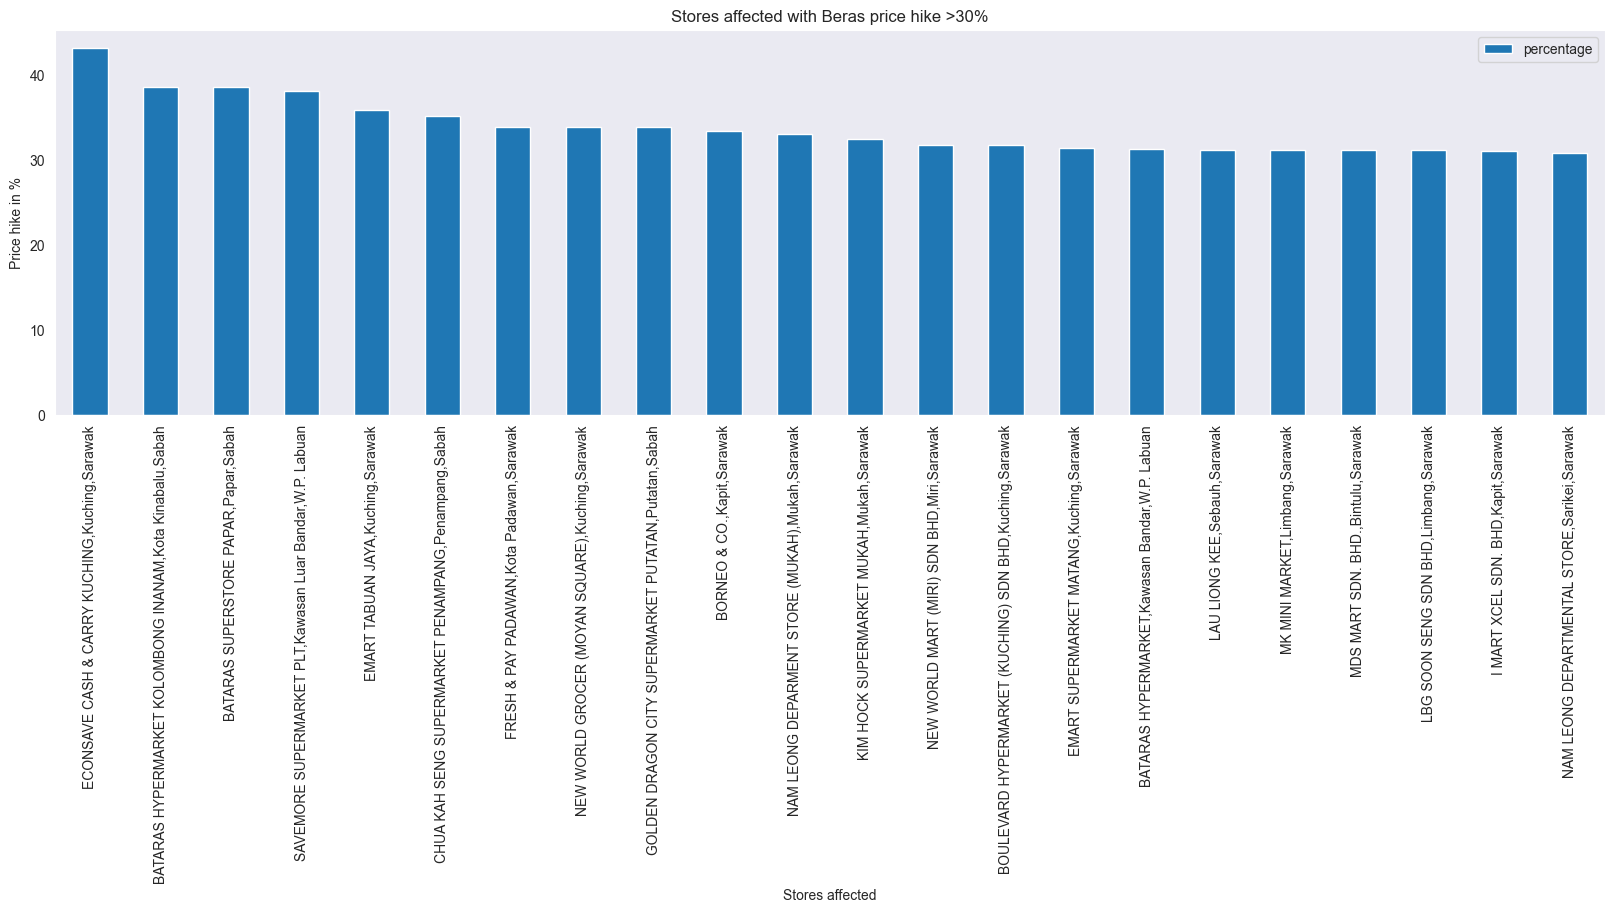

In [62]:
ax = df_beras_naik2[['percentage']].plot.bar(figsize=(20,5),rot=90,title='Stores affected with Beras price hike >30%')
ax.set(xlabel='Stores affected', ylabel='Price hike in %')

In [63]:
import seaborn as sns
sns.set_style("dark")

[Text(0.5, 0, 'Stores affected'), Text(0, 0.5, 'RM')]

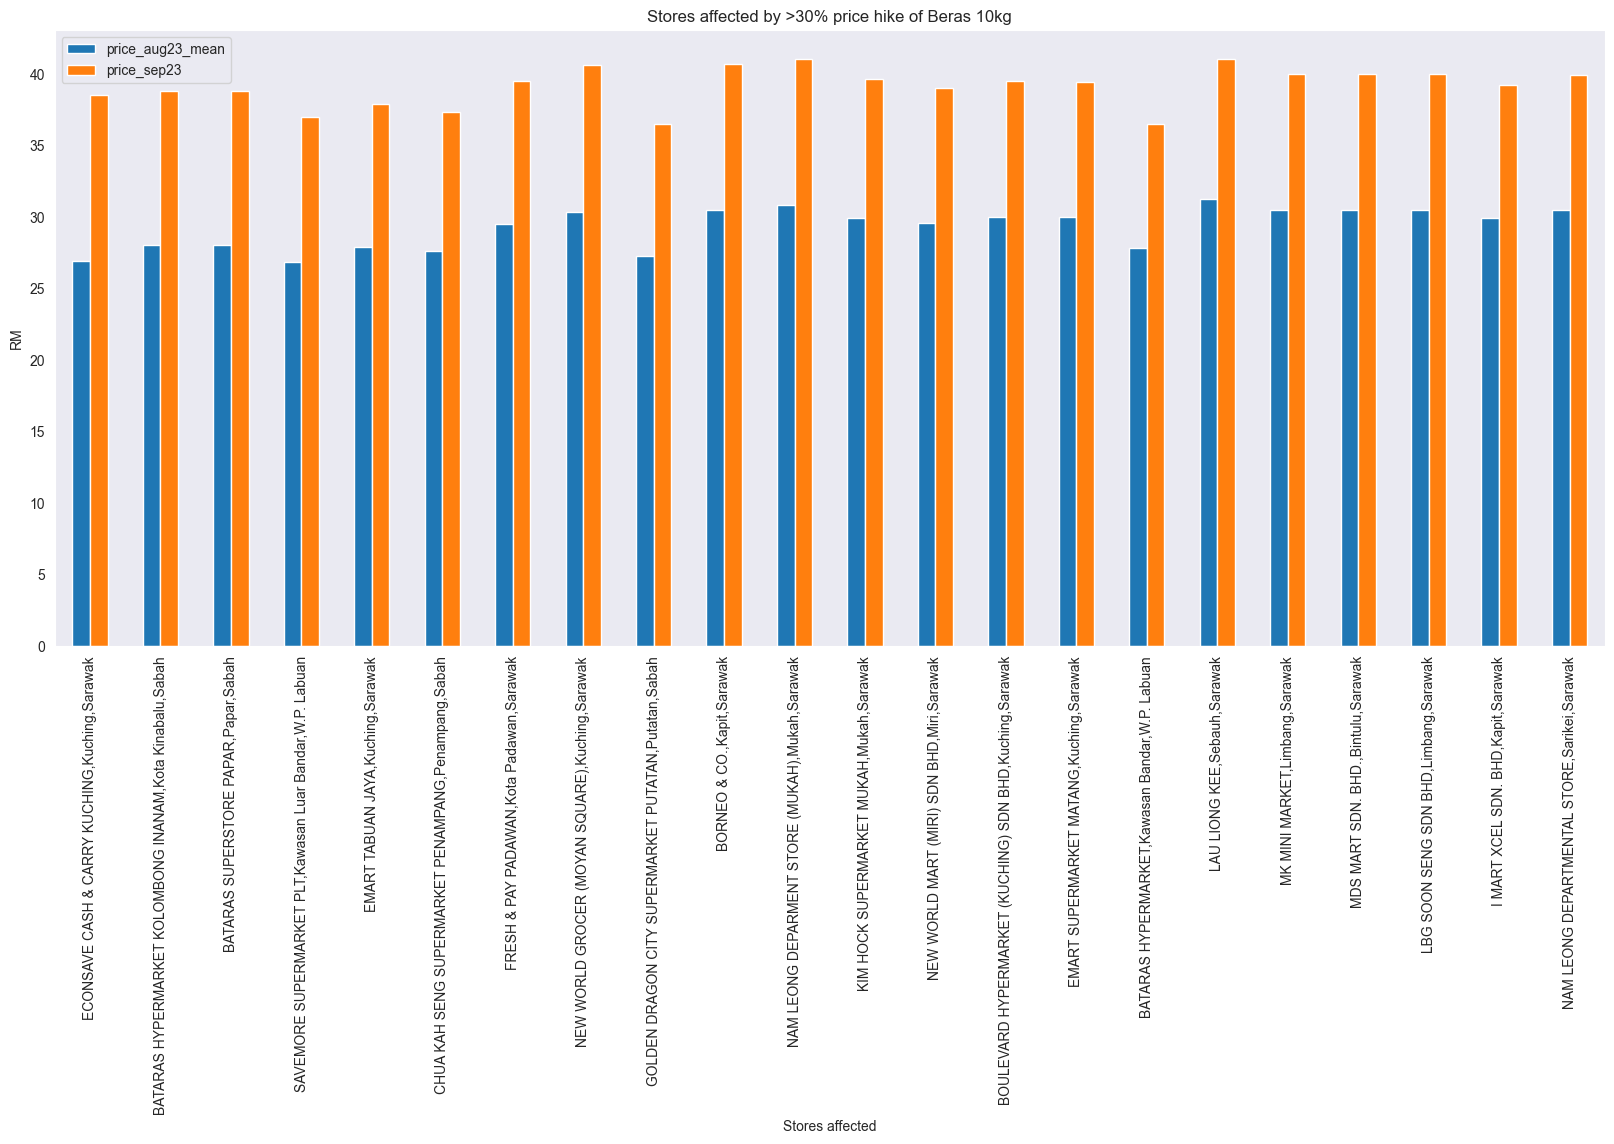

In [64]:
ax = df_beras_naik2[['price_aug23_mean','price_sep23']].plot.bar(figsize=(20,8),rot=90,title='Stores affected by >30% price hike of Beras 10kg')
ax.set(xlabel='Stores affected',ylabel='RM')

Q. How many states are affected by a 30% price hike of beras?

A. 3 states, sabah,swak,labuan. But this is only because some other states doesn't necessarily have beras data for this month(sept23)

In [65]:
df_beras_naik["state"].unique()

array(['Sarawak', 'Sabah', 'W.P. Labuan'], dtype=object)

In [66]:
df_beras_sep23['state'].unique()

array(['Melaka', 'W.P. Kuala Lumpur', 'W.P. Putrajaya', 'Sarawak',
       'Sabah', 'Pulau Pinang', 'Kedah', 'Terengganu', 'Negeri Sembilan',
       'Selangor', 'W.P. Labuan', 'Perak', 'Kelantan', 'Johor', 'Pahang'],
      dtype=object)